## einsum 补充

- https://rockt.github.io/2018/04/30/einsum
- https://pytorch.org/docs/stable/generated/torch.einsum.html

In [1]:
import torch

### `ij, j->i`

In [6]:
a = torch.randn(3, 4)
b = torch.randn(4)

In [7]:
a * b

tensor([[-0.2172,  0.1115, -0.9244, -0.0106],
        [-0.1119, -0.0060,  0.4080,  0.0856],
        [-0.4363, -1.3421, -0.7374,  0.0181]])

In [8]:
a @ b

tensor([-1.0407,  0.3757, -2.4976])

In [9]:
torch.einsum('ij,j->i', a, b)

tensor([-1.0407,  0.3757, -2.4976])

### `nc,nc->n`

- `nc,nc->nc`: element-wise multiplication
- `nc => n`：row sum => row reduce 

In [9]:
a = torch.randint(0, 3, [2, 3])
b = torch.randint(0, 3, [2, 3])

In [10]:
a

tensor([[0, 1, 2],
        [2, 1, 2]])

In [11]:
b

tensor([[0, 2, 2],
        [0, 1, 0]])

In [12]:
torch.einsum('nc,nc->n', [a, b])

tensor([6, 1])

In [13]:
torch.sum(a * b, dim=1)

tensor([6, 1])

## einops

- https://github.com/arogozhnikov/einops
    - https://github.com/arogozhnikov/einops/tree/master/docs

### ViT

In [37]:
from einops import rearrange
from torchvision import transforms
from PIL import Image

In [40]:
image = Image.open('./imgs/boo.jpg')
image.size

(1500, 1500)

In [52]:
transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
#         transforms.RandomResizedCrop(224),
#         transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]
)

In [53]:
img = transform(image)

In [54]:
patch_sz = 16

In [55]:
x_patch = rearrange(img, 'c (h p1) (w p2) -> (h w) (p1 p2 c)', p1=patch_sz, p2=patch_sz)

In [56]:
x_patch.shape

torch.Size([196, 768])

In [57]:
16*16*3

768

In [58]:
import matplotlib.pyplot as plt

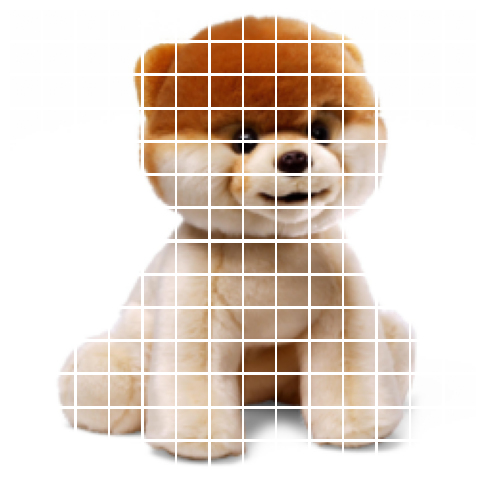

In [66]:
plt.figure(figsize=(6, 6))

for i, patch in enumerate(x_patch):
    # 将patch的形状从 (p1*p2*c) 调整为 (p1, p2, c) 以便于matplotlib可以正确绘制
    patch_img = patch.reshape(patch_sz, patch_sz, 3)
    
    # 添加subplot
    plt.subplot(14, 14, i+1)
    plt.imshow(patch_img)
    plt.axis('off')  # 不显示坐标轴
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.tight_layout()
plt.show()